In [1]:
import pandas as pd

# Load the dataset provided by the user
file_path = 'MaterialStrength.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
dataset.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,target_feature
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,0.300000,540.0,1.538462,1,0.350044,YEs,NO,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,0.300000,540.0,1.560651,1,0.452416,yES,nOO,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,0.685714,475.0,1.569024,0,6.704743,yEs,NO,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,0.685714,475.0,1.569024,0,8.891596,yes,NOO,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,0.966767,331.0,1.185221,0,8.126411,YeS,no,44.30


In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Create a copy of the dataset for preprocessing
processed_dataset = dataset.copy()

# Encode categorical columns (x14 and x15) using LabelEncoder
label_encoder_x14 = LabelEncoder()
label_encoder_x15 = LabelEncoder()

processed_dataset['x14'] = label_encoder_x14.fit_transform(processed_dataset['x14'].str.lower())
processed_dataset['x15'] = label_encoder_x15.fit_transform(processed_dataset['x15'].str.lower())

# Extract features and target variable
X = processed_dataset.drop('target_feature', axis=1)
y = processed_dataset['target_feature']

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the scaled dataset
pd.DataFrame(X_scaled, columns=X.columns).head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,-1.428268,1.409900,1.426392,0.763008,-0.567688,0.363137,-1.019610
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,-1.428268,1.409900,1.545960,0.763008,-0.500380,0.363137,0.980767
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066,-0.199303,0.708983,1.591077,-1.310602,3.610422,0.363137,-1.019610
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677,-0.199303,0.708983,1.591077,-1.310602,5.048241,0.363137,0.980767
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487,0.696189,-0.843819,-0.477051,-1.310602,4.545145,0.363137,-1.019610


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_regressor.predict(X_test)

# Evaluate the Decision Tree model
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Display the evaluation results
mse_dt, rmse_dt, r2_dt


(19.665753883495142, 4.434608650545743, 0.9236805692955532)

In [4]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the k-NN Regressor (using k=5 as a starting point)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the k-NN model
knn_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_regressor.predict(X_test)

# Evaluate the k-NN model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Display the evaluation results
mse_knn, rmse_knn, r2_knn


(97.22656755339806, 9.860353317878525, 0.6226803035885449)

In [5]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Train the Linear Regression model
linear_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_regressor.predict(X_test)

# Evaluate the Linear Regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Display the evaluation results
mse_linear, rmse_linear, r2_linear


(75.17815626765773, 8.670533793697924, 0.708246420567028)

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Initialize Polynomial Features with degree 2
poly_features = PolynomialFeatures(degree=2)

# Create a pipeline with polynomial features and linear regression
poly_regressor = make_pipeline(poly_features, LinearRegression())

# Train the Polynomial Regression model
poly_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_poly = poly_regressor.predict(X_test)

# Evaluate the Polynomial Regression model
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Display the evaluation results
mse_poly, rmse_poly, r2_poly


(37.138975425023936, 6.094175532836574, 0.8558699819912262)

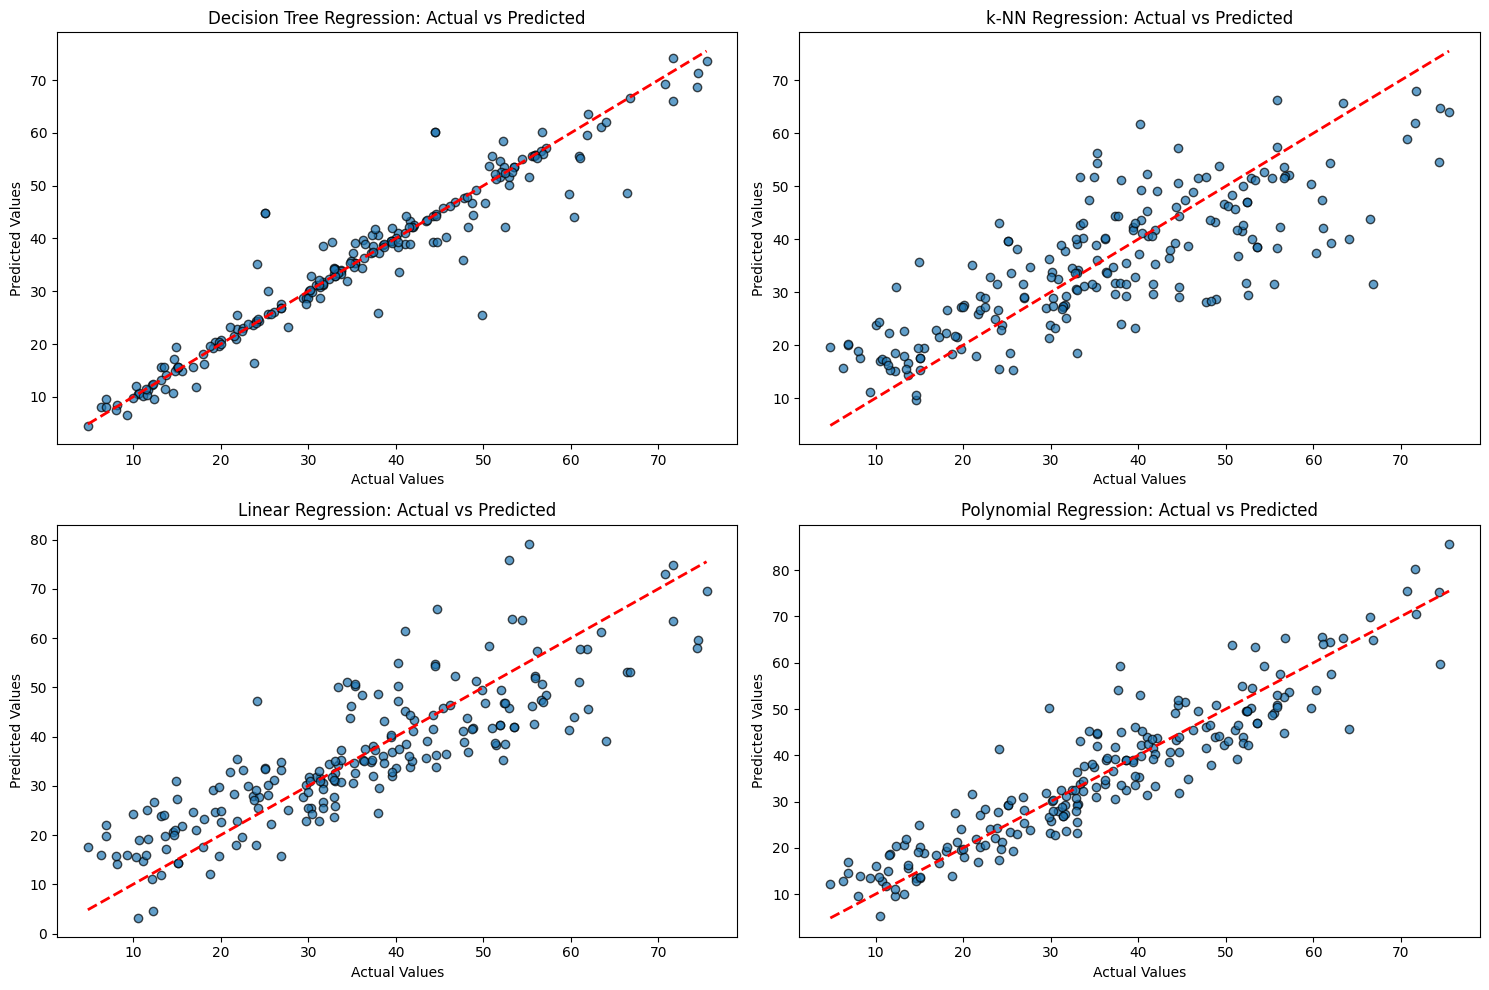

In [7]:
import matplotlib.pyplot as plt

# Set up the figure for the scatter plots
plt.figure(figsize=(15, 10))

# Scatter plot for Decision Tree Regression
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_dt, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Scatter plot for k-NN Regression
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_knn, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('k-NN Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Scatter plot for Linear Regression
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_linear, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Scatter plot for Polynomial Regression
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_poly, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Polynomial Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
